# Dimensionality reduction 
In many datasets there are often too many features based on which the conclusion drawn. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. It can be imagined that a 2D data i.e a data having two features which are linearly dependent on each other, such data can be reduced to a single dimension. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

![title](1pca.bmp)
![title](2pca.bmp)

##  Advantages of dimensionality reduction
   1. It reduces the time and storage space required.
   
   2. Removal of multi-collinearity improves the performance of the machine-learning model.
   
   3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. 
    
##  Disadvantages of dimensionality reduction 

   1. It may lead to some amount of data loss.
   
   2. PCA tends to find linear correlations between variables, which is sometimes undesirable.
   
   3. PCA fails in cases where mean and covariance are not enough to define datasets.
   
   4. We may not know how many principal components to keep- in practice, some thumb rules are applied.
    
    
## Principal component analysis  
Particularly, in this we need to transform variables into a new set of variables. As these are a linear combination of original variables. These new set of variables are known as principal components. Further, we need to obtain these in particular way. As first principle component accounts for the possible variation of original data. After which each succeeding component has the highest possible variance. The second principal component must be orthogonal to the first principal component. For two-dimensional dataset, there can be only two principal components. Applying PCA to your dataset loses its meaning.

##  PCA vs Linear Regression 
One might feel like we’re supposed to fit a line between multiple dimensions exploiting their linear dependence to obtain a single dimension just like linear regression, but it’s not true, linear regression and PCA are two separate things. Here in PCA we’re not trying to predict something on basis of a line. PCA is trying to find a lower dimension surface of line onto which it should project the data, so as to minimize the squared projection error (see diagram square projection error is the perpendicular distance from principal vector, while in linear regression the SSE is the difference in y value ).

![title](3pca.bmp)

## PCA algorithm
   •	Data pre-processing : feature scaling / mean normalisation should always be performed.
   
   •	Calculation of covariance matrix.
   
   •	Find eigen values and eigen vectors corresponding to covariance matrix.
   
   •	Select top k eigen vectors which would account for most of the variance in data.
   
   •	Transform the original dataset with respect to these eigen vectors .
   

## Maths Behind PCA

**Covariance**

The first term we’ll need to understand is covariance. Covariance is a metric measured between two variables. It gives a measure of how changes in one dimension affect changes in the other. Covariance is a measure to find out how much the dimensions vary from the mean with respect to each other. It’s always measured between two dimensions
![](cov.PNG)

**Difference Betwwen Covariance and Corelation**

Covariance measures how two variables move with respect to each other and is an extension of the concept of variance (which tells about how a single variable varies). It can take any value from -∞ to +∞.

Higher this value, more dependent is the relationship. A positive number signifies positive covariance and denotes that there is a direct relationship. Effectively this means that an increase in one variable would also lead to a corresponding increase in the other variable provided other conditions remain constant.
On the other hand, a negative number signifies negative covariance which denotes an inverse relationship between the two variables. Though covariance is perfect for defining the type of relationship, it is bad for interpreting its magnitude.

Correlation is a step ahead of covariance as it quantifies the relationship between two random variables. In simple terms, it is a unit measure of how these variables change with respect to each other (normalized covariance value).

Unlike covariance, the correlation has an upper and lower cap on a range. It can only take values between +1 and -1. A correlation of +1 indicates that random variables have a direct and strong relationship.
On the other hand, correlation of -1 indicates that there is a strong inverse relationship and an increase in one variable will lead to an equal and opposite decrease in the other variable. 0 indicates that the two numbers are independent.

**EigenVectors**

Intuitively, an eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.
Let A be a square matrix, ν a vector and λ a scalar that satisfies Aν = λν, then λ is called eigenvalue associated with eigenvector ν of A.

**Process**
![](mat.PNG)
1.The data from the above table can be represented in matrix A, where each column in the matrix shows scores on a test and each row shows the score of a student.
![](mean.PNG)
2.Compute the covariance matrix of the whole dataset ( sometimes also called as the variance-covariance matrix)
![](covmat.PNG)
3.Compute Eigenvectors and corresponding Eigenvalues
![](det.PNG)
![](eigenvalues.PNG)
![](vec.PNG)
4.Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.
![](sorted.PNG)
So, eigenvectors corresponding to two maximum eigenvalues are
![](2d.PNG)
5.Transform the samples onto the new subspace.y = W′ × x where W′ is the transpose of the matrix W.

**Eigen-Faces**

Eigen Vectors are called faces(Important features) when plotted.

The original Image and Image formed after linear combination of 4 eigen-faces.
![](original.PNG)
Eigen Faces and their Linear Combination
![](faces.PNG)
![](using4eigenvectors.PNG)

## Code

**DataSet Intro**

Labelled Faces In Wild(LFW)

The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [3]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [4]:
lfw.keys()
lfw.data.shape

(1140, 1850)

In [5]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)

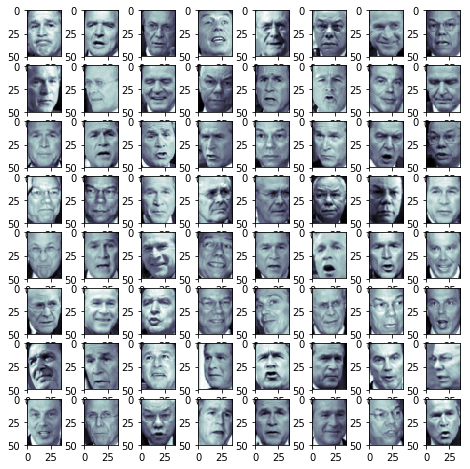

In [6]:
plt.show()

In [7]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y)
pca_oliv=PCA()
pca_oliv.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
k=0
total=0
while total<0.99:
    total=total+pca_oliv.explained_variance_ratio_[k]
    k=k+1
k

319

In [9]:
pca_lfw=PCA(n_components=k)
x_transformed=pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 319)

In [10]:
x_approx=pca_lfw.inverse_transform(x_transformed)
x_approx=x_approx.reshape(855,50,37)

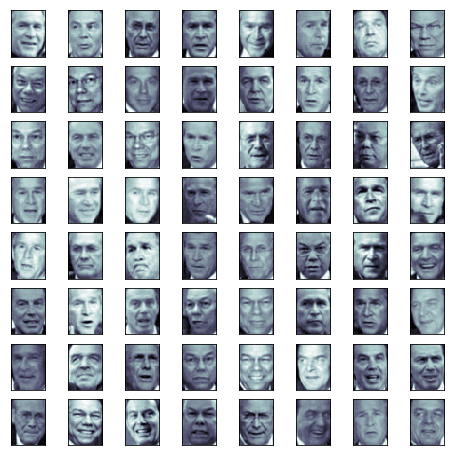

In [11]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [12]:
pca_lfw.components_.shape

(319, 1850)

In [13]:
eigenv=pca_lfw.components_.reshape(k,50,37)

In [14]:
fig=plt.figure(figsize=(8,8))

In [15]:
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(eigenv[i],cmap=plt.cm.bone)

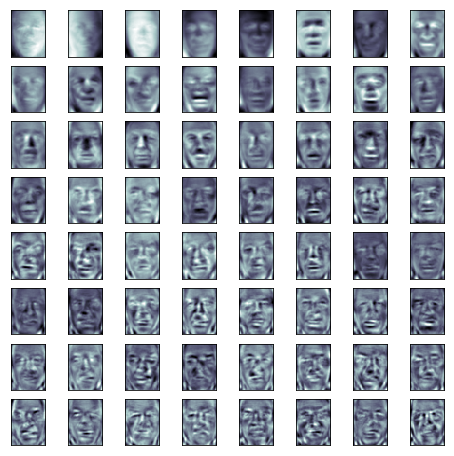

In [16]:
plt.show()

In [17]:
x_train_pca=x_transformed
x_test_pca=pca_lfw.transform(x_test)

In [18]:
rf=ensemble.RandomForestClassifier()

In [19]:
start=time.time()

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
print(time.time()-start)

0.6000344753265381


In [22]:
y_pred=rf.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.57      0.67      0.62        54
          1       0.47      0.33      0.39        24
          2       0.70      0.86      0.77       142
          3       0.62      0.18      0.28        28
          4       0.73      0.43      0.54        37

avg / total       0.65      0.66      0.63       285



In [24]:
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)

0.23601341247558594


In [25]:
y_pred=rf.predict(x_test_pca)

In [26]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.37      0.39      0.38        54
          1       0.17      0.17      0.17        24
          2       0.59      0.78      0.67       142
          3       0.43      0.11      0.17        28
          4       0.00      0.00      0.00        37

avg / total       0.42      0.49      0.44       285



In [27]:
print(confusion_matrix(y_test,y_pred))

[[ 21   6  24   0   3]
 [  2   4  16   1   1]
 [ 19   6 111   3   3]
 [  4   3  15   3   3]
 [ 11   4  22   0   0]]


## Reconstruction of original Image

In [28]:
x_approx=pca_lfw.inverse_transform(x_train_pca)

In [29]:
x_approx.shape
x_train_reconstruct=x_approx.reshape((855,50,37))

In [30]:
fig1=plt.figure(figsize=(8,8))

In [31]:
for i in range(64):
    ax=fig1.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(x_train_reconstruct[i],cmap=plt.cm.bone)

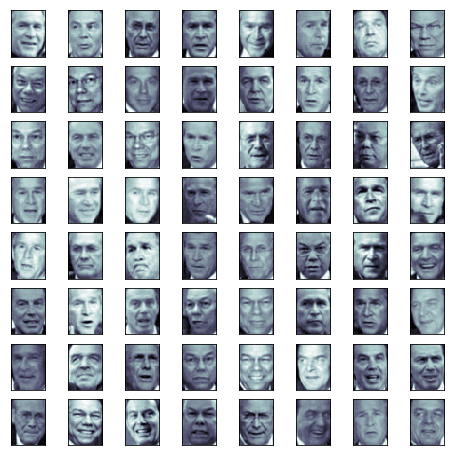

In [32]:
plt.show()